<a href="https://colab.research.google.com/github/lm934/Case-Study-Graduate-Admission-Predictor/blob/main/Jamboree_CaseStudy_02_08_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**JAMBOREE EDUCATIUON**

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**Objective of the Case Study:**
This analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

Serial No. (Unique row ID)

GRE Scores (out of 340)

TOEFL Scores (out of 120)

University Rating (out of 5)

Statement of Purpose and Letter of Recommendation Strength (out of 5)

Undergraduate GPA (out of 10)

Research Experience (either 0 or 1)

Chance of Admit (ranging from 0 to 1)

In [1]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#read the dataset and showing the top 20 records
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv")
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


**Exploratory Data Analysis**

In [3]:
#removed the indexing and set_index as serial number
data2 = data.copy()
data2.set_index("Serial No.", inplace=True)
data2

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
496,332,108,5,4.5,4.0,9.02,1,0.87
497,337,117,5,5.0,5.0,9.87,1,0.96
498,330,120,5,4.5,5.0,9.56,1,0.93


In [ ]:
data.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [ ]:
#checking how many rows and columns are there in the dataset
data.shape

(500, 9)

There are 500 rows and 9 columns in the dataset

In [ ]:
#column names of the dataset
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
# Inspecting the columns and their data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
# Checking for null values -
data.isnull().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


As we can see there are no null values of missing values present in the dataset

In [ ]:
#generate descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset’s distribution,
stats = data.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
Serial No.,500.0,250.50000,144.481833,1.00,125.7500,250.50,375.25,500.00
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [ ]:
data["Chance of Admit "].value_counts()

Chance of Admit 
0.71    23
0.64    19
0.73    18
0.72    16
0.79    16
        ..
0.38     2
0.36     2
0.43     1
0.39     1
0.37     1
Name: count, Length: 61, dtype: int64

Outlier detecetion

<Axes: >

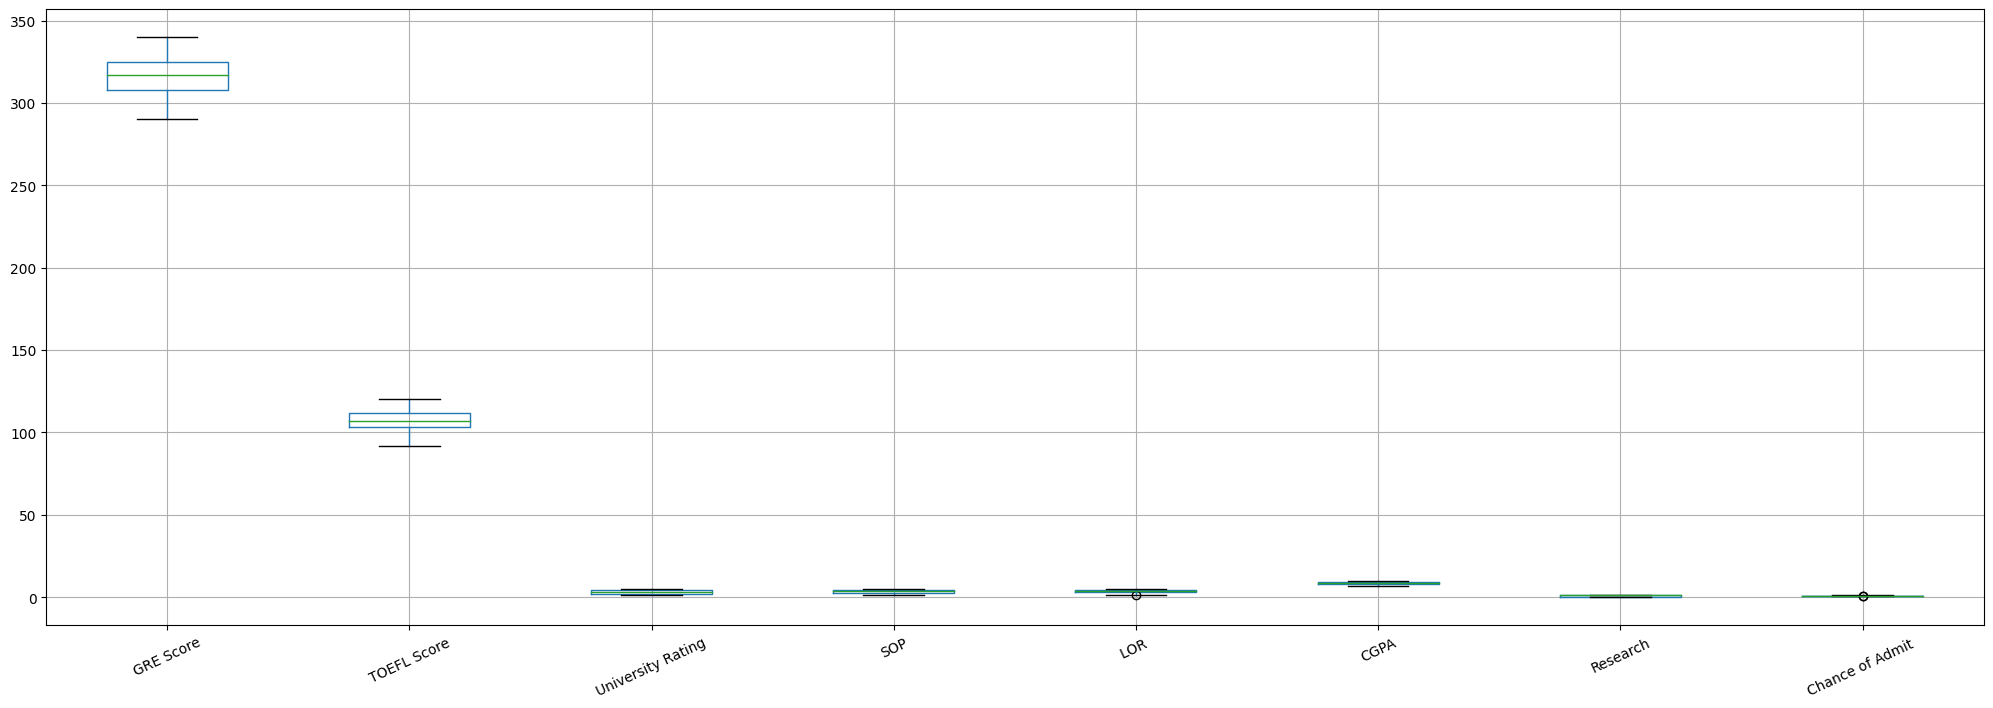

In [ ]:
columns = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit ']
data[columns].boxplot(rot=25, figsize=(25,8))

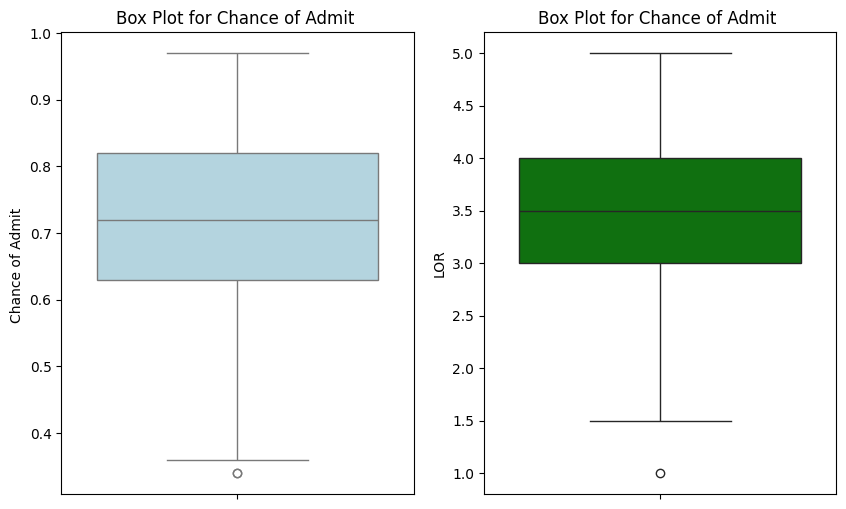

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.boxplot(y=data['Chance of Admit '], color='lightblue')
plt.title('Box Plot for Chance of Admit ')
plt.ylabel('Chance of Admit ')

plt.subplot(1,2,2)
sns.boxplot(y=data['LOR '], color='green')
plt.title('Box Plot for LOR')
plt.ylabel('LOR')

plt.show()

<ipython-input-4-eb9e7dcdbc39>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="CGPA", x="Chance of Admit ", data=data, palette="Blues")
<ipython-input-4-eb9e7dcdbc39>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="University Rating", x="Chance of Admit ", data=data, palette="Greens")


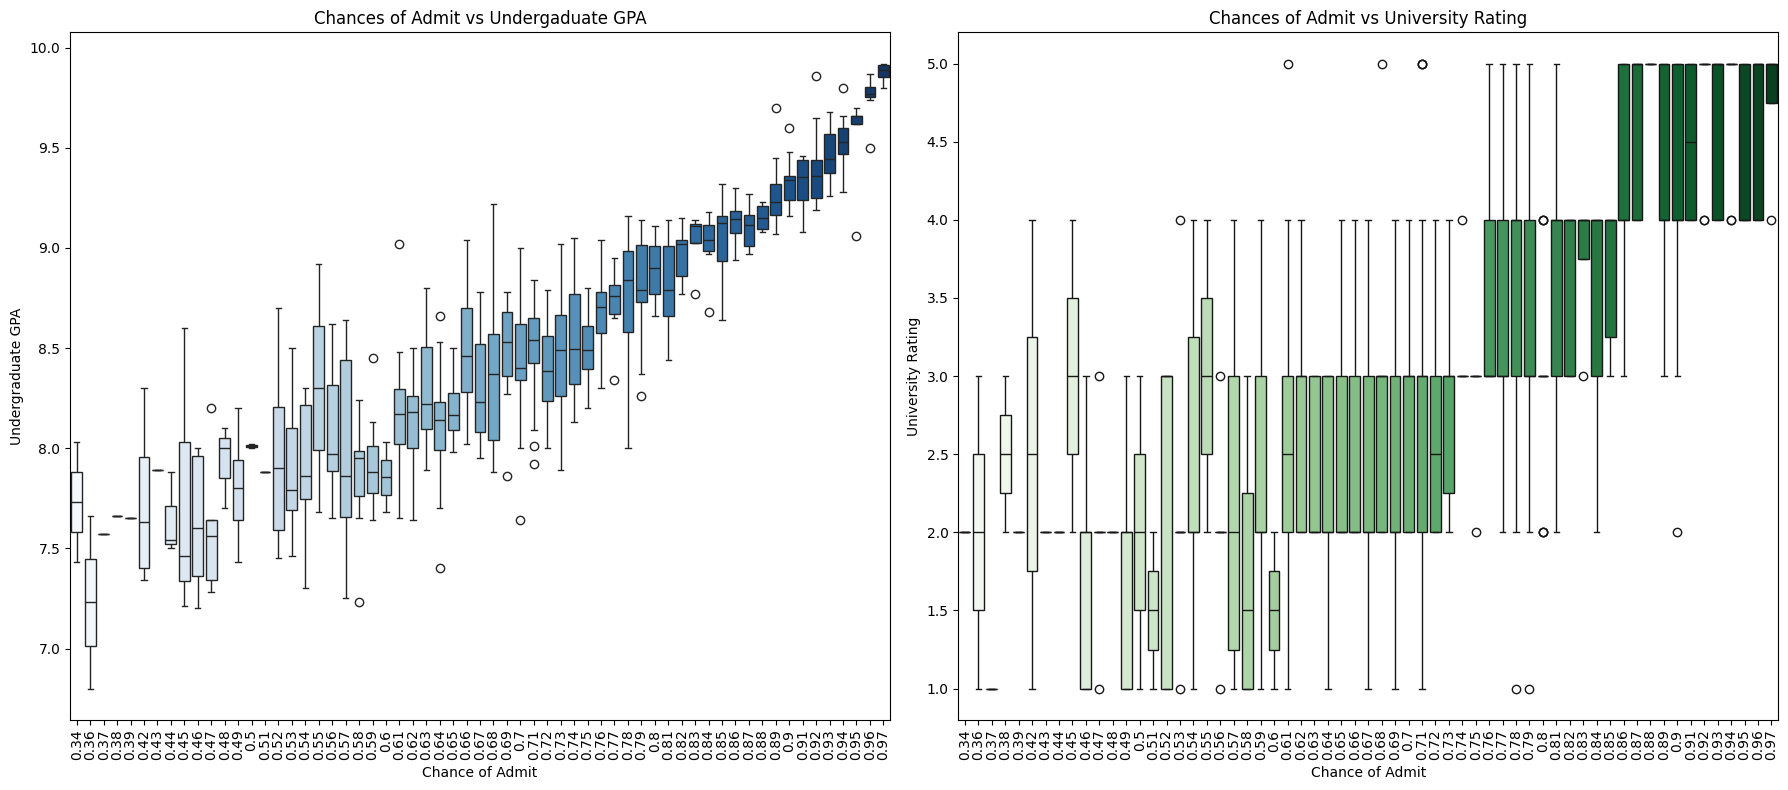

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.boxplot(y="CGPA", x="Chance of Admit ", data=data, palette="Blues")
plt.xticks(rotation=90)
plt.title("Chances of Admit vs Undergaduate GPA")
plt.xlabel("Chance of Admit")
plt.ylabel("Undergraduate GPA")

plt.subplot(1,2,2)
sns.boxplot(y="University Rating", x="Chance of Admit ", data=data, palette="Greens")
plt.xticks(rotation=90)
plt.title("Chances of Admit vs University Rating")
plt.xlabel("Chance of Admit")
plt.ylabel("University Rating")

plt.tight_layout()
plt.show()

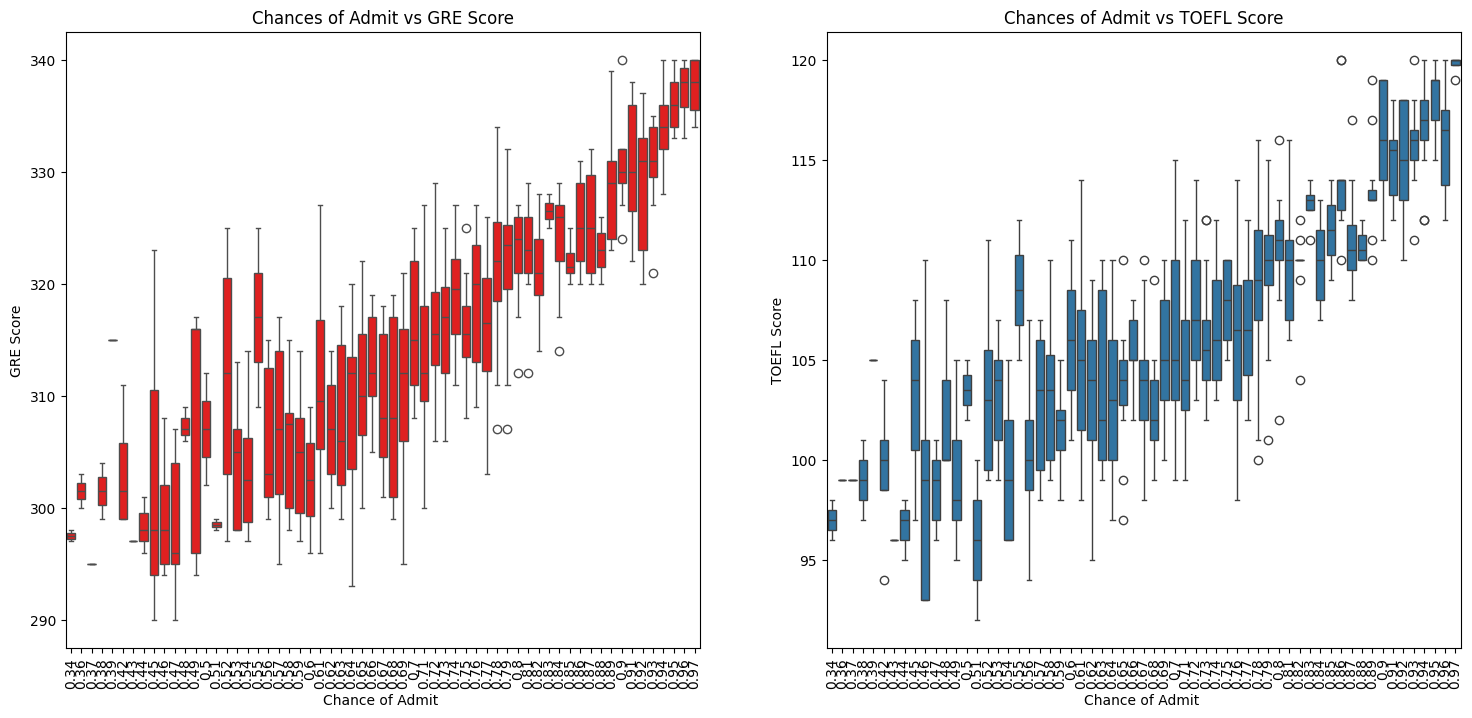

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.boxplot(y="GRE Score", x="Chance of Admit ", data=data, color="red")
plt.xticks(rotation=90)
plt.title("Chances of Admit vs GRE Score")

plt.subplot(1,2,2)
sns.boxplot(y="TOEFL Score", x="Chance of Admit ", data=data)
plt.xticks(rotation=90)
plt.title("Chances of Admit vs TOEFL Score")

plt.show()

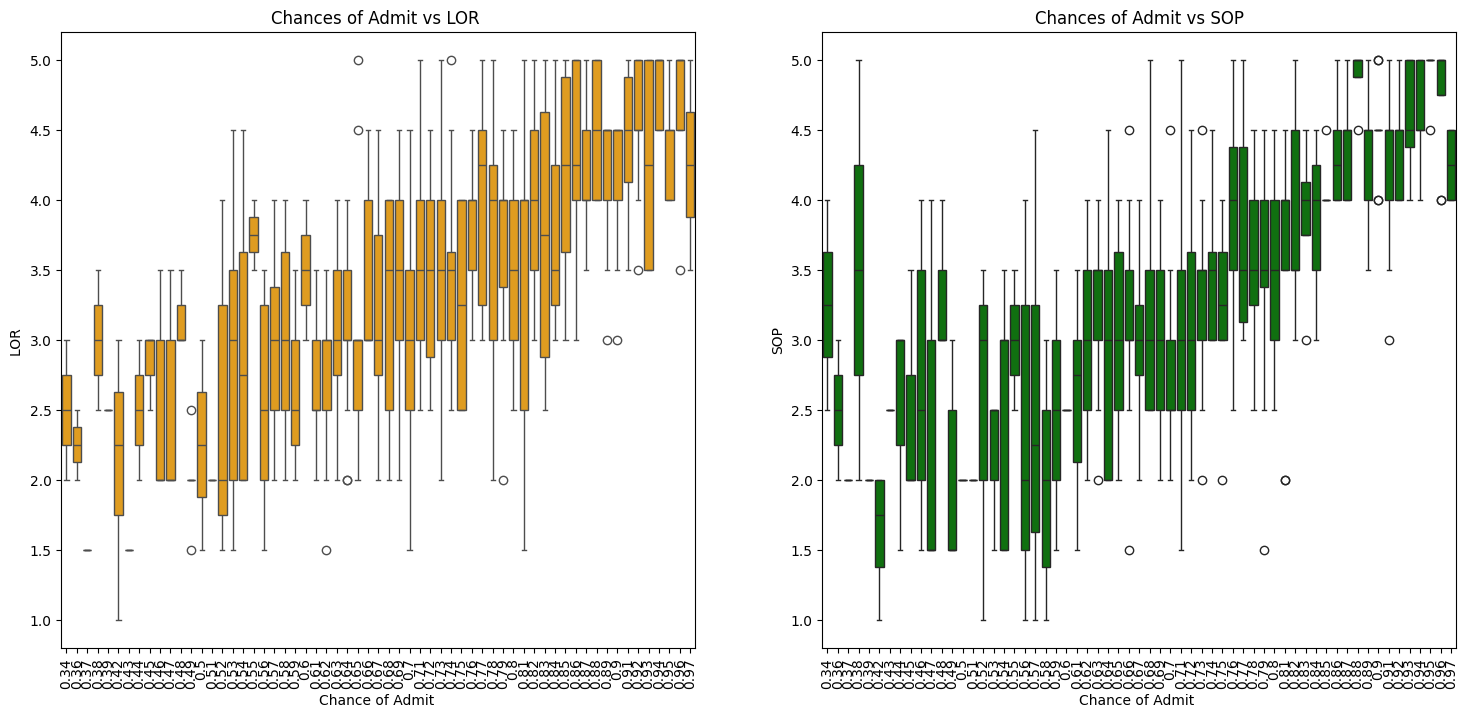

In [ ]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.boxplot(y="LOR ", x="Chance of Admit ", data=data, color="orange")
plt.xticks(rotation=90)
plt.title("Chances of Admit vs LOR ")

plt.subplot(1,2,2)
sns.boxplot(y="SOP", x="Chance of Admit ", data=data, color="green")
plt.xticks(rotation=90)
plt.title("Chances of Admit vs SOP")

plt.show()

From the above boxplots,it is clearly highlight the presence of outliers in Chance of Admit and LOR. and there are no outliers present in any other columns.



Univariate Analysis

<ipython-input-5-b2538dca0379>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(data2['GRE Score'], kde=False)


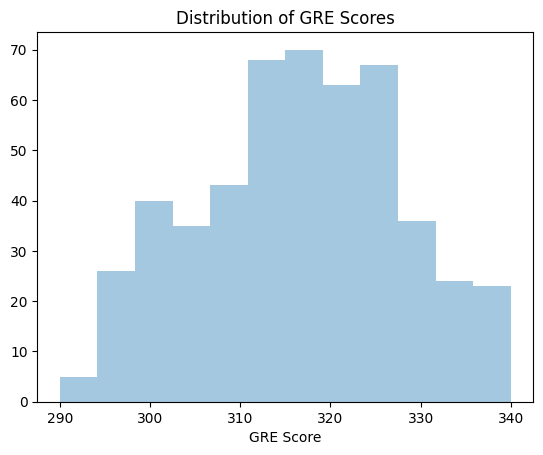

<ipython-input-5-b2538dca0379>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(data2['TOEFL Score'], kde=False)


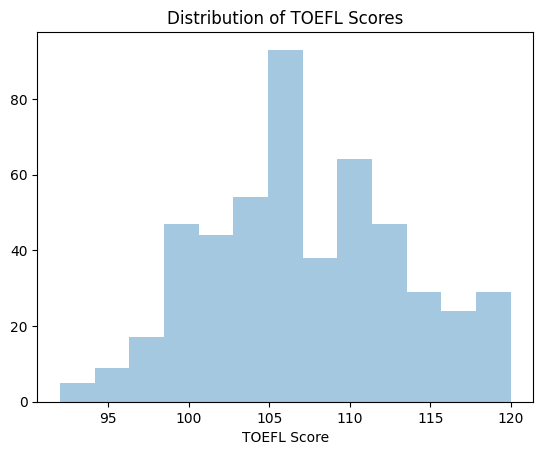

<ipython-input-5-b2538dca0379>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(data2['University Rating'], kde=False)


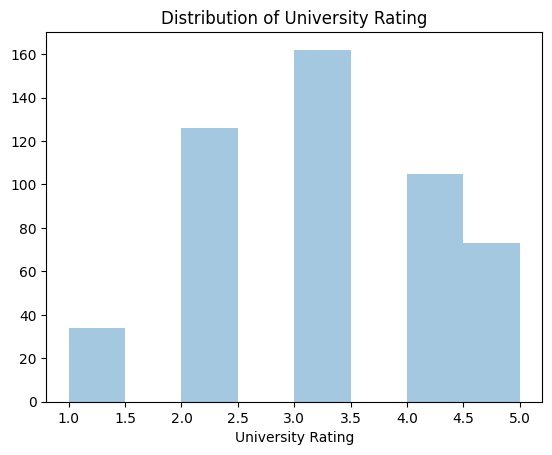

<ipython-input-5-b2538dca0379>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(data2['SOP'], kde=False)


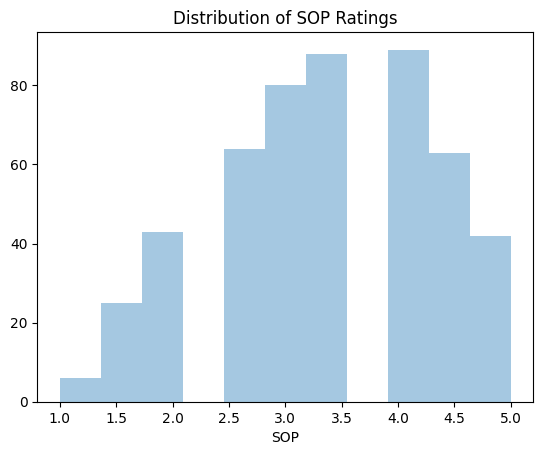

<ipython-input-5-b2538dca0379>:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  figure = sns.distplot(data2['CGPA'], kde=False)


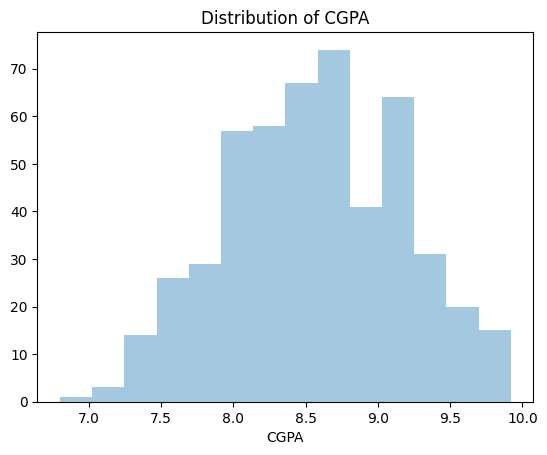

In [5]:
figure = sns.distplot(data2['GRE Score'], kde=False)
plt.title("Distribution of GRE Scores")
plt.show()

figure = sns.distplot(data2['TOEFL Score'], kde=False)
plt.title("Distribution of TOEFL Scores")
plt.show()

figure = sns.distplot(data2['University Rating'], kde=False)
plt.title("Distribution of University Rating")
plt.show()

figure = sns.distplot(data2['SOP'], kde=False)
plt.title("Distribution of SOP Ratings")
plt.show()

figure = sns.distplot(data2['CGPA'], kde=False)
plt.title("Distribution of CGPA")
plt.show()

It is clear from the distributions, students with varied merit apply for the university.

Bivariate Analysis

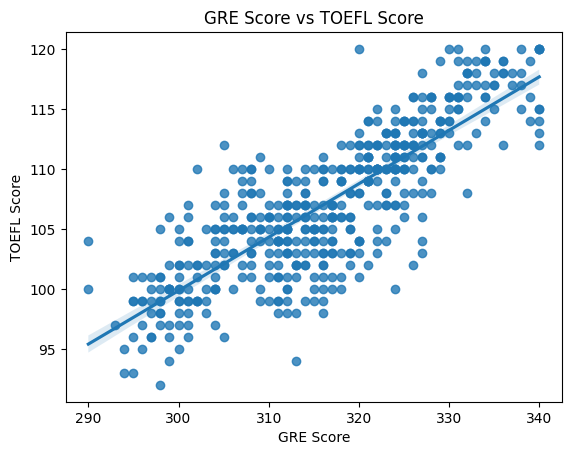

In [6]:
fig = sns.regplot(x="GRE Score", y="TOEFL Score", data=data2)
plt.title("GRE Score vs TOEFL Score")
plt.show()

People with higher GRE Scores also have higher TOEFL Scores

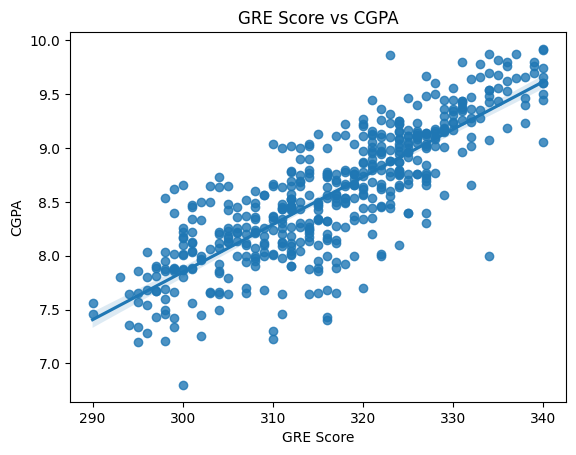

In [7]:
fig = sns.regplot(x="GRE Score", y="CGPA", data=data2)
plt.title("GRE Score vs CGPA")
plt.show()

People with higher CGPA usually have higher GRE scores maybe because they are smart.

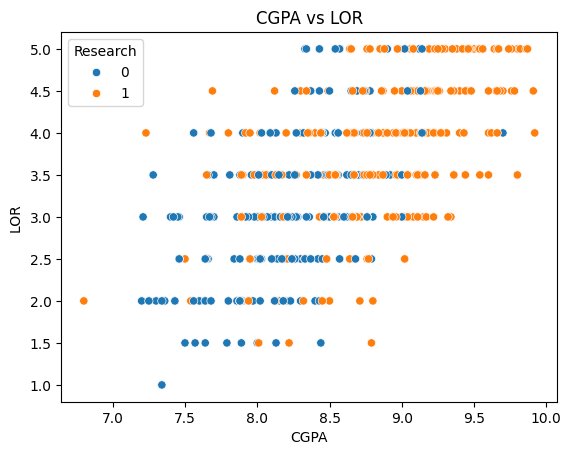

In [10]:
fig = sns.scatterplot(x="CGPA", y="LOR ", data=data2, hue="Research")
plt.title("CGPA vs LOR")
plt.show()

LORs are not that related with CGPA so it is clear that a persons LOR is not dependent on that persons academic excellence.

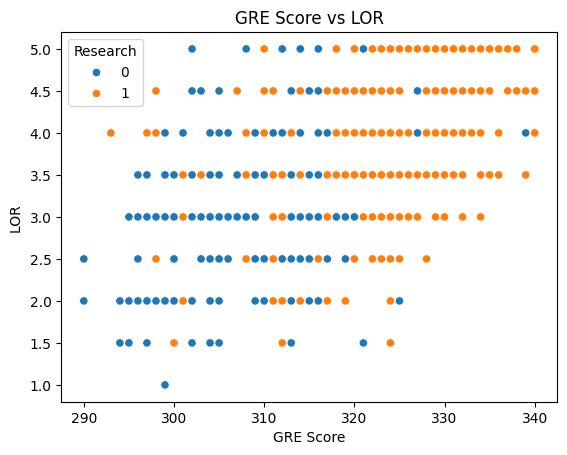

In [11]:
fig = sns.scatterplot(x="GRE Score", y="LOR ", data=data2, hue="Research")
plt.title("GRE Score vs LOR")
plt.show()

GRE scores and LORs are also not that related. People with different kinds of LORs have all kinds of GRE scores.

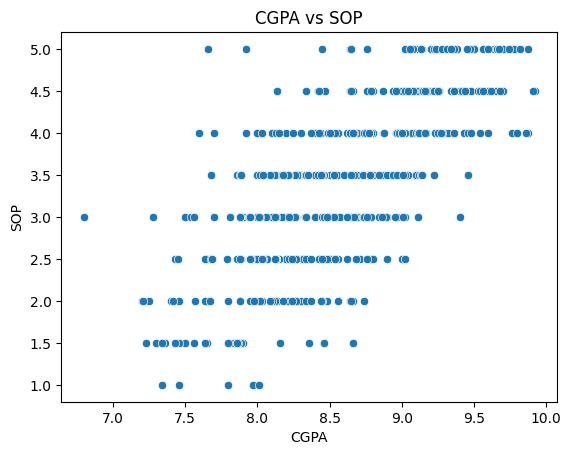

In [12]:
fig = sns.scatterplot(x="CGPA", y="SOP", data=data2)
plt.title("CGPA vs SOP")
plt.show()

CGPA and SOP are not that related because Statement of Purpose is related to academic performance, but since people with good CGPA tend to be more hard working.

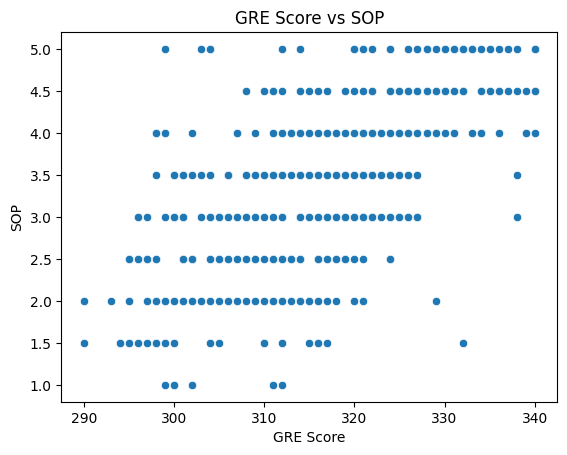

In [13]:
fig = sns.scatterplot(x="GRE Score", y="SOP", data=data2)
plt.title("GRE Score vs SOP")
plt.show()

<ipython-input-9-1bae3d5f1fd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='University Rating', y='Chance of Admit ', data=data, palette='muted')


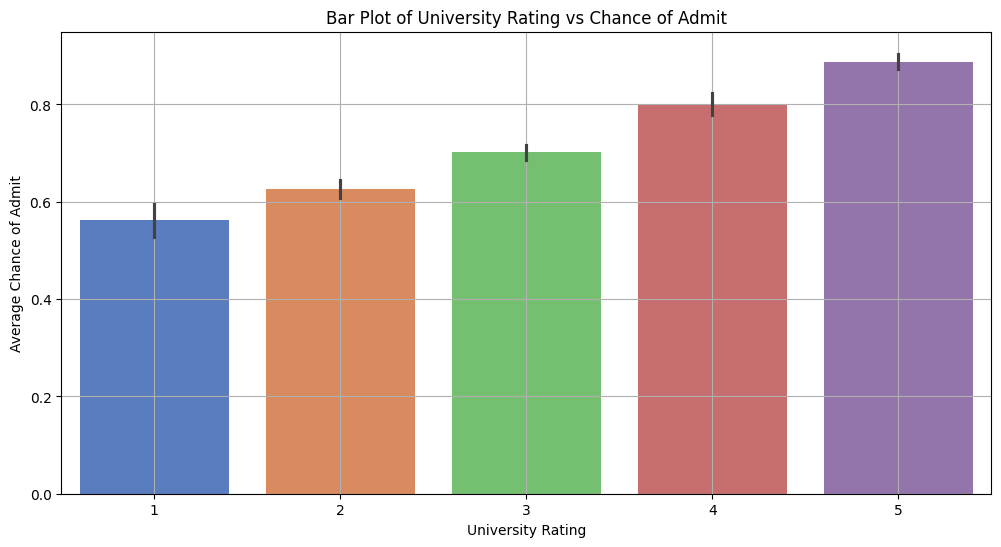

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='University Rating', y='Chance of Admit ', data=data, palette='muted')
plt.title('Bar Plot of University Rating vs Chance of Admit')
plt.xlabel('University Rating')
plt.ylabel('Average Chance of Admit')
plt.grid(True)

# Show the plot
plt.show()

From the above analysis from the bar plot, correctly highlights a correlation between university ratings and the chances of admission.The chance of admit is above 0.8 when the university rating is maximum(that is 5) and below 0.6 when the rating decreases to the minimum(1).

Text(0.5, 1.0, 'TOEFL Score vs Chance of Admit On the basis of SOP')

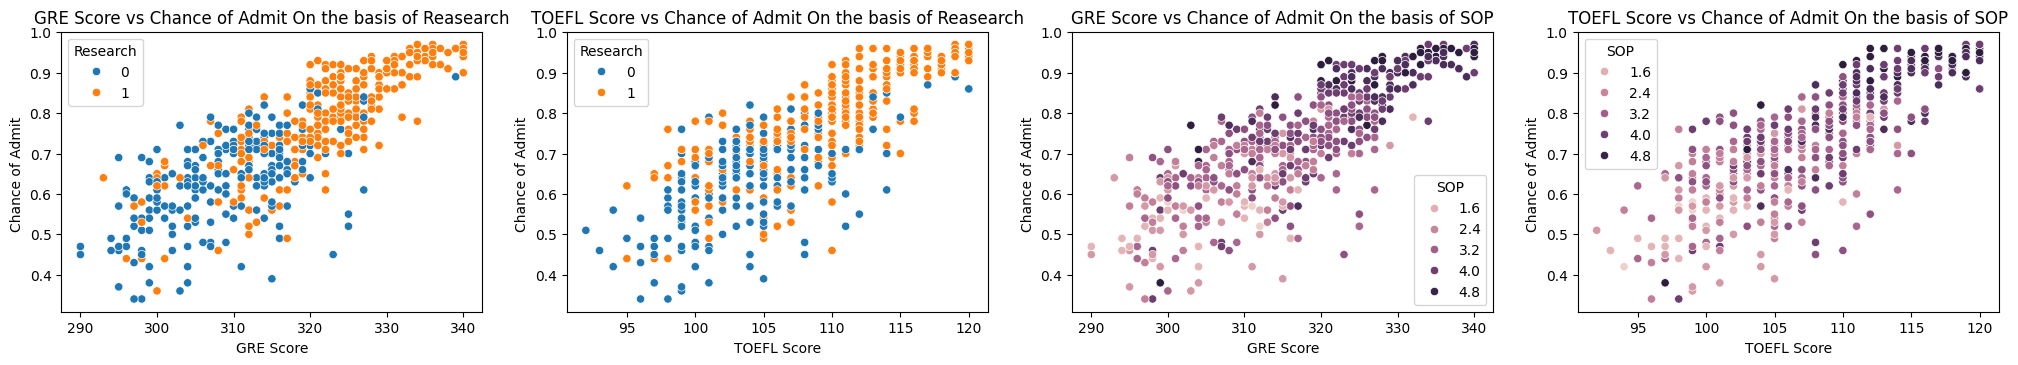

In [ ]:
plt.figure(figsize=(25,8))

plt.subplot(2,4,1)
sns.scatterplot(x="GRE Score", data=data, y="Chance of Admit ", hue="Research")
plt.title("GRE Score vs Chance of Admit On the basis of Reasearch")

plt.subplot(2,4,2)
sns.scatterplot(x="TOEFL Score", data=data, y="Chance of Admit ", hue="Research")
plt.title("TOEFL Score vs Chance of Admit On the basis of Reasearch")

plt.subplot(2,4,3)
sns.scatterplot(x="GRE Score", data=data, y="Chance of Admit ", hue="SOP")
plt.title("GRE Score vs Chance of Admit On the basis of SOP")

plt.subplot(2,4,4)
sns.scatterplot(x="TOEFL Score", data=data, y="Chance of Admit ", hue="SOP")
plt.title("TOEFL Score vs Chance of Admit On the basis of SOP")


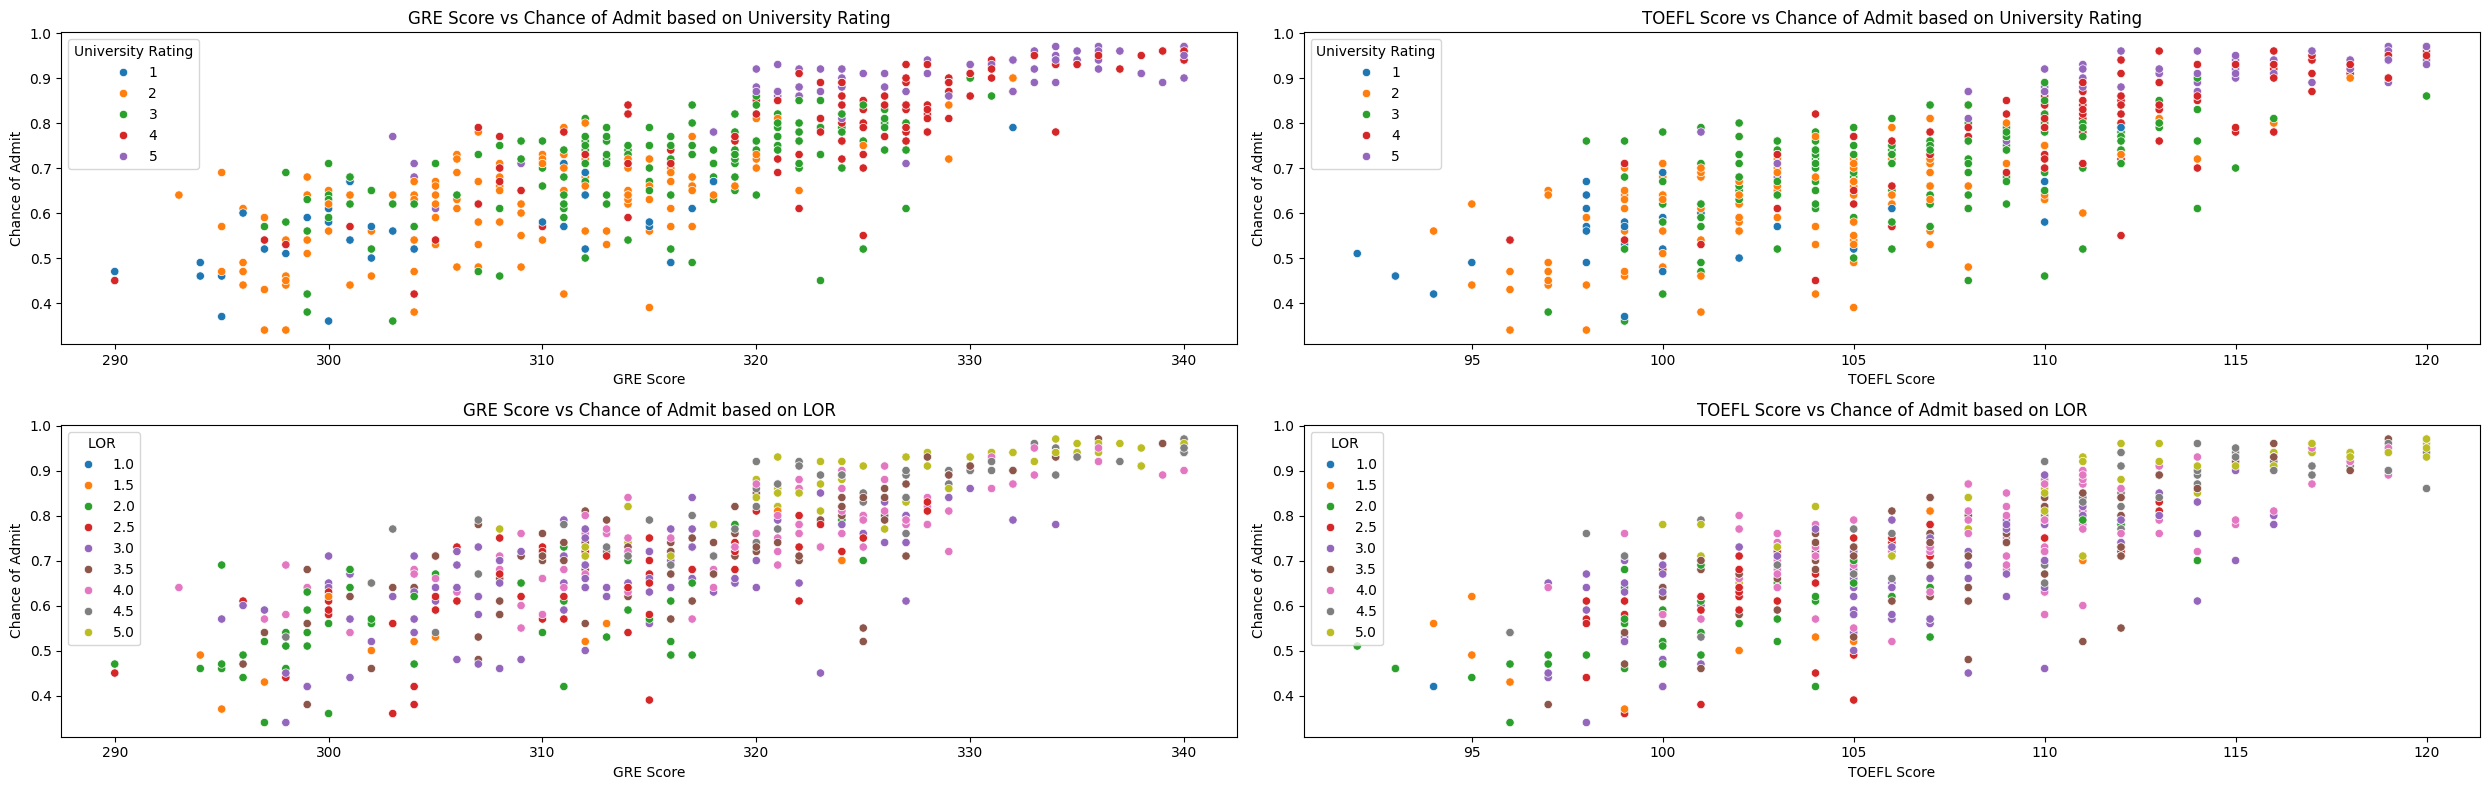

In [ ]:
plt.figure(figsize=(25, 8))

# Plot 1: GRE Score vs Chance of Admit based on University Rating
plt.subplot(2, 2, 1)
sns.scatterplot(x="GRE Score", y="Chance of Admit ", hue="University Rating", data=data, palette="tab10")
plt.title("GRE Score vs Chance of Admit based on University Rating")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")

# Plot 2: TOEFL Score vs Chance of Admit based on University Rating
plt.subplot(2, 2, 2)
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", hue="University Rating", data=data, palette="tab10")
plt.title("TOEFL Score vs Chance of Admit based on University Rating")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")

# Plot 3: GRE Score vs Chance of Admit based on LOR
plt.subplot(2, 2, 3)
sns.scatterplot(x="GRE Score", y="Chance of Admit ", hue="LOR ", data=data, palette="tab10")
plt.title("GRE Score vs Chance of Admit based on LOR")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")

# Plot 4: TOEFL Score vs Chance of Admit based on LOR
plt.subplot(2, 2, 4)
sns.scatterplot(x="TOEFL Score", y="Chance of Admit ", hue="LOR ", data=data, palette="tab10")
plt.title("TOEFL Score vs Chance of Admit based on LOR")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")

# Adjust layout
plt.tight_layout()
plt.show()

From the above analysis:

1.GRE Score and TOEFL Score vs. Chance of Admit on the Basis of Research
Observation:
Students with Research Experience: Students who have conducted research tend to have a higher chance of admission when their GRE and TOEFL scores are strong. The presence of research experience acts as a significant positive factor in the admissions process.
**Students without Research Experience:** For students lacking research experience, even if they have high GRE and TOEFL scores, the chances of admission are generally lower compared to their peers with research experience.

**Nonlinear Relationship:** There seems to be a more complex, possibly nonlinear relationship between GRE/TOEFL and admit chances, further influenced by research experience.

2.** GRE Score and TOEFL Score vs Chance of Admit On the basis of SOP**:
Based on the visualization, Students with high SOP ratings and good GRE/TOEFL scores have a higher chance of admission. The SOP is likely being used by admissions committees as a critical component of evaluating applicants.
Students with lower SOP ratings find it more challenging to secure admissions even if their GRE and TOEFL scores are decent.

3.** GRE Score and TOEFL Score vs Chance of Admit On the basis of LOR**:
**LOR as a Strong Predictor:** Similar to SOP, a high LOR score contributes significantly to admission chances. This suggests that letters of recommendation are highly valued in the evaluation process.
**LOR Influence Varies:** Students with low LOR scores may still achieve good admission chances if they compensate with high GRE/TOEFL scores, but the advantage is noticeable for those with strong recommendations.

4.2.** GRE Score and TOEFL Score vs Chance of Admit On the basis of University Rating**:
The key observation here is that students with higher university ratings tend to have better chances of admission, especially when coupled with strong GRE and TOEFL scores. This indicates that university rating may be a significant factor in evaluating a student's profile.

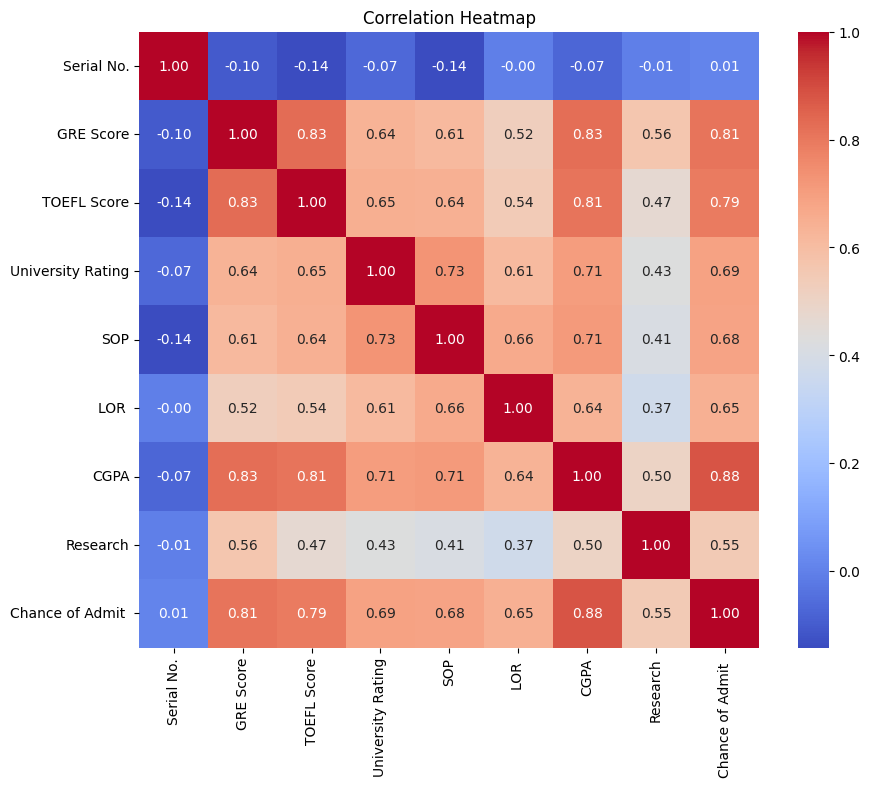

In [ ]:
# Heatmap for Correlation Analysis
plt.figure(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

# Customization
plt.title('Correlation Heatmap')
plt.show()

**Regression analysis: **
A regression analysis provides insights into how these variables collectively affect the chance of admission.

In [15]:
#Now let's see how we can split our data.Split the data into train and test data
# Define independent variables
X = data[data.columns.drop('Chance of Admit ')]
# Define independent variables
y = data['Chance of Admit ']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [16]:
X_train.shape, X_test.shape

((400, 8), (100, 8))

In [17]:
y_train.shape, y_test.shape

((400,), (100,))

In [18]:
X_train

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,239,310,104,3,2.0,3.5,8.37,0
438,439,318,110,1,2.5,3.5,8.54,1
475,476,300,101,3,3.5,2.5,7.88,0
58,59,300,99,1,3.0,2.0,6.80,1
380,381,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...,...
255,256,307,110,4,4.0,4.5,8.37,0
72,73,321,111,5,5.0,5.0,9.45,1
396,397,325,107,3,3.0,3.5,9.11,1
235,236,326,111,5,4.5,4.0,9.23,1


In [19]:
y_train

,Chance of Admit
238,0.70
438,0.67
475,0.59
58,0.36
380,0.78
...,...
255,0.79
72,0.93
396,0.84
235,0.88


In [ ]:
#We will use X_train and y_train to train our model,and X_test and y_test to evaluate the model's performance.
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.coef_

array([9.76733816e-05, 1.90947002e-03, 3.51200926e-03, 5.91970674e-03,
       7.14176608e-03, 1.14206007e-02, 1.13449585e-01, 1.79035079e-02])

In [ ]:
model.intercept_

-1.3472213002024247

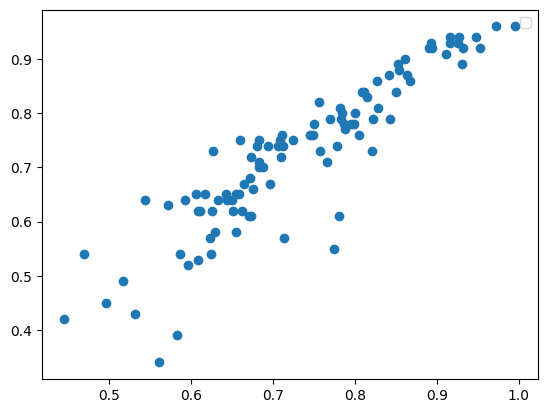

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
y_hat = model.predict(X_test)
plt.scatter(y_hat,y_test)
plt.legend()
plt.show()

In [ ]:
#checking the performance of our previously trained model on test data.
model.score(X_train,y_train), model.score(X_test, y_test)

(0.8308687000598886, 0.8191594750751487)

In [ ]:
# Statmodels implementation of Linear regression
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define independent variables
X = data[data.columns.drop('Chance of Admit ')]
# Define independent variables
y = data['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#standardization
scaler = StandardScaler()
x_tr_scaled = scaler.fit_transform(X_train)

y_train = np.array(y_train)
x_sm = sm.add_constant(x_tr_scaled) #Adding constant
sm_model = sm.OLS(y_train, x_sm).fit()

print(sm_model.summary())
print(X)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     240.1
Date:                Wed, 07 Aug 2024   Prob (F-statistic):          9.69e-146
Time:                        04:19:28   Log-Likelihood:                 570.05
No. Observations:                 400   AIC:                            -1122.
Df Residuals:                     391   BIC:                            -1086.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7209      0.003    244.983      0.0

The goal of this regression analysis is to understand the significance and influence of each variable on the chance of admission. By examining the coefficients, p-values, and overall model statistics, we can determine which factors are most critical for admissions.

1. R-squared: 0.831

This indicates that approximately 83.1% of the variability in the dependent variable is explained by the independent variables in the model. A high R-squared value suggests a good fit, meaning that the model accounts for a significant portion of the variance in the target variable.

2. Adj. R-squared: 0.827

Adjusted R-squared adjusts the R-squared value based on the number of predictors in the model. It's slightly lower than the R-squared value, which is expected as it accounts for the degrees of freedom.

3. F-statistic: 240.1

The F-statistic tests the overall significance of the regression model. A high F-statistic value, coupled with a low p-value (Prob (F-statistic)), suggests that the model is statistically significant.

4. Prob (F-statistic): 9.69e-146

This is the p-value for the F-statistic. It is extremely low, indicating that at least one of the predictors is significantly related to the dependent variable.

**Conclusion:**

**Significant Variables**
x1, x2, x3, x6, x7, x8:
These variables have p-values less than 0.05, suggesting they have a statistically significant impact on the Chance of Admit.
x7 is the most significant predictor, with a very high t-value of 10.691 and a coefficient of 0.0687, indicating it has a substantial positive effect.

**Non-Significant Variables**
x4, x5:
These variables have p-values greater than 0.05, suggesting they may not significantly impact the dependent variable within this model.



**Test the assumptions of linear regression:**

1. Multicollinearity check by VIF score
2. Mean of residuals
3. Linearity of variables (no pattern in residual plot)
4. Test for Homoscedasticity
5. Normality of residuals

In [ ]:
# 1.Mutlicolinearity check by VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()
x_tr = scaler.fit_transform(X_train)
vif = pd.DataFrame()
X_t = pd.DataFrame(x_tr, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]

# Round the VIF values and sort them
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
1,GRE Score,4.88
6,CGPA,4.77
2,TOEFL Score,4.28
4,SOP,3.01
3,University Rating,2.80
5,LOR,2.12
7,Research,1.51
0,Serial No.,1.06


**Multicollinearity Insights:**

High VIF Scores: GRE Score, CGPA, and TOEFL Score have high VIF scores, indicating multicollinearity among these variables.
Low VIF Scores: LOR and Research have low VIF scores, indicating they are not collinear with other predictors.

In [ ]:
#2. Mean of Residuals:
#Outliers will have large error value (yi - yi_hat).

# Splitting features and target
X = data2[data2.columns.drop('Chance of Admit ')]
y = data2["Chance of Admit "]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Scaling features
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

# Adding a constant for intercept
X_sm = sm.add_constant(X_tr_scaled)

# Fit OLS model
sm_model = sm.OLS(y_train, X_sm).fit()

# Predict with OLS model
Y_hat = sm_model.predict(X_sm)

# Calculate residuals
residuals = y_train - Y_hat
residuals
residuals.mean()

-2.6700863742235013e-16

**Insights:**

Good Fit: A mean residual close to zero (-2.6700863742235013e-16.) generally suggests that the model is well-fitted in terms of bias. The residuals don’t exhibit a clear pattern of systematic bias (e.g., always positive or always negative).

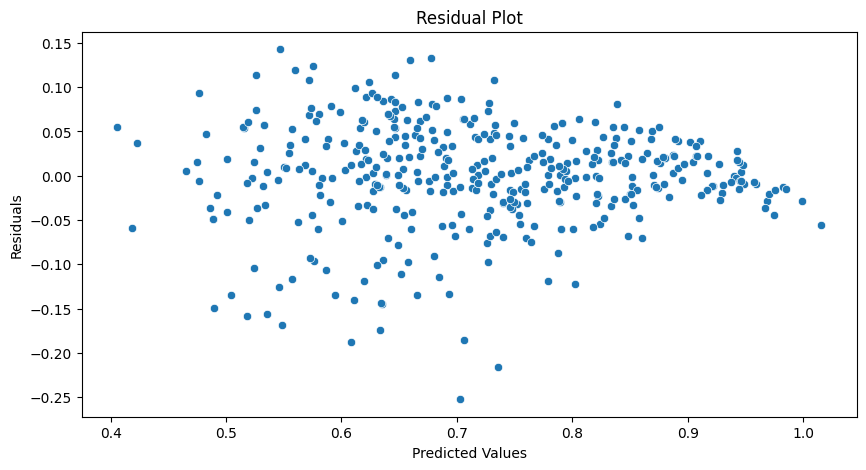

In [ ]:
# 3.Linearity of variables (no pattern in residual plot)

X_scaled = scaler.fit_transform(X_train)
# Fit linear regression
model = LinearRegression()
model.fit(X_scaled, y_train)
# Predict and calculate residuals
predictions = model.predict(X_scaled)
residuals = y_train - predictions
# Residual plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=predictions, y=residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

**Insights:**

No Pattern in Residual Plot means that the residuals appear to be randomly scattered around the horizontal axis. This randomness indicates that the model has properly captured the relationship between the predictors and the dependent variable.So that this assumption holds true

Text(0.5, 1.0, 'Predicted values vs Residuals')

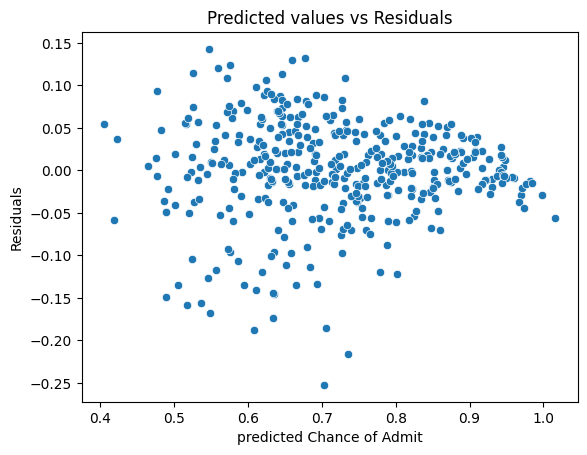

In [ ]:
# 4. Test for Homoscedasticity
X = data2[data2.columns.drop('Chance of Admit ')]
y = data["Chance of Admit "]
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_sm = sm.add_constant(X_tr_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()
Y_hat = sm_model.predict(X_sm)
residuals = (y_train)-(Y_hat)
sns.scatterplot(x=Y_hat,y=residuals)
plt.xlabel("predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")

**Insights:**

A reverse funnel shape in the residual plot suggests heteroscedasticity, where the variance of errors is not constant.


In [ ]:
# Performing the Goldfeld-Quandt test -(This test is used to test the presence of Heteroscedasticity in the given data)
#Null Hypothesis: Heteroscedasticity is not present
#Alternate Hypothesis: Heteroscedasticity is present

from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_sm)
lzip(name, test)

[('F statistic', 1.041126179952999), ('p-value', 0.39045799798715997)]

**Insights:**

The larger the F-statistic, the more evidence we’ll have against the homoskedasticity assumption and the more likely we have heteroskedasticity (different variance for the two groups).

Text(0.5, 1.0, 'Histogram of residuals')

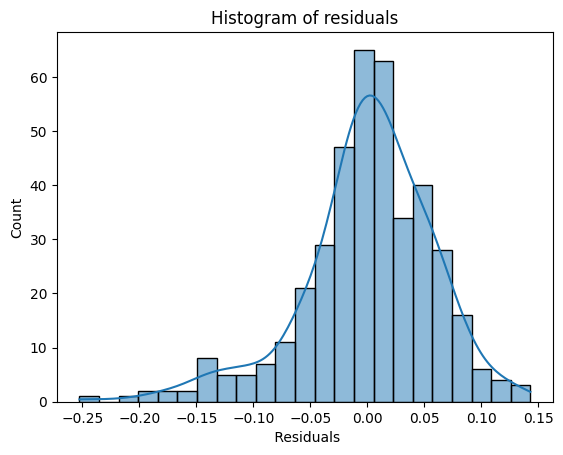

In [ ]:
#5. Normality of residuals
sns.histplot(residuals, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")

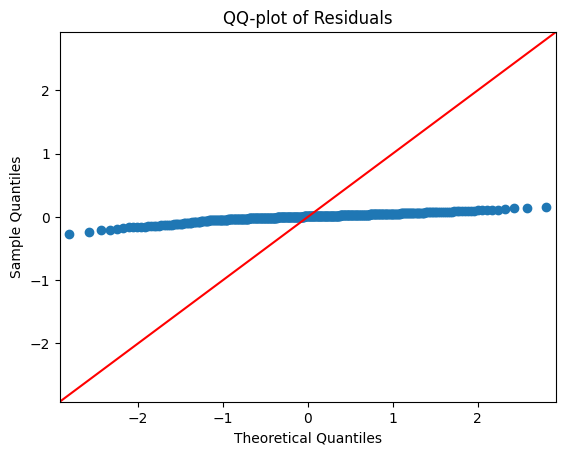

In [ ]:
#Normality can also be checked using QQ Plot
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line="45")
plt.title('QQ-plot of Residuals')
plt.show()

In [ ]:
#we can also check the normality using shapiro test to confirm it is a normal distribution
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(stat, p_value)
# Interpret the result
if p_value > 0.05:
    print("Residuals are normally distributed (fail to reject H0).")
else:
    print("Residuals are not normally distributed (reject H0).")

0.9360627211765712 4.418349743669542e-12
Residuals are not normally distributed (reject H0).


**Insights:**

1. The histogram of residuals shows slight left skewness, indicating some deviation from normality.
2. The QQ plot's horizontal line suggests that the residuals do not follow a perfect normal distribution.
3. The Shapiro-Wilk test gives a statistic of 0.936 and a very small p-value (< 0.05), indicating that the residuals significantly deviate from normality.

**Model evaluation- MAE, RMSE, R2 score, Adjusted R2.**

In [ ]:
#MAE (Mean Absolute Error:It’s the average of the absolute differences between predicted values and actual values)
MAE = mean_absolute_error(y_test, y_hat)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 0.0411213198043009


In [ ]:
#RMSE (Root Mean Squared Error: measures the square root of the average squared differences between predicted values and actual values)
RMSE = np.sqrt(mean_squared_error(y_test, y_hat))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 0.0590949352891075


In [ ]:
#R-Squared Error(It indicates how well the model explains the variability of the target variable)
X = data[data.columns.drop('Chance of Admit ')]
y = data["Chance of Admit "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)
X_te_scaled = scaler.fit_transform(X_test)
X_tr_sm = sm.add_constant(X_tr_scaled)
X_te_sm = sm.add_constant(X_te_scaled)
sm_model = sm.OLS(y_train, X_sm).fit()
Y_hat = sm_model.predict(X_te_sm)
r2 = r2_score(y_test, Y_hat)
r2

0.8221973898706014

In [ ]:
#adjusted R2 score(Adjusted R-squared accounts for the number of predictors and adjusts R2 to avoid overfitting.)
Adj_R2 = 1-(1-r2_score(y_test, Y_hat))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.8065663911779071

**Model Evaluation Insights:**
1. Mean Absolute Error (MAE): 0.0411 suggests that, on average, the predictions are off by about 0.0411.
2. Root Mean Squared Error (RMSE): 0.0591, indicating the model's prediction errors' standard deviation.
3. R² Score: 0.8222 indicates that the model explains 82.22% of the variance in the dependent variable.
4. Adjusted R² Score: 0.8066 adjusts for the number of predictors in the model, giving a more accurate measure of model fit.

**Conclusion AND Recommendation**

1. The MAE, RMSE, R², and Adjusted R² scores indicate a reasonably good model, but there is room for improvement, particularly in handling non-linearity and heteroscedasticity.

2. The residuals' deviation from normality suggests potential outliers or model misspecification

3.  GRE Score, CGPA, and TOEFL Score show high multicollinearity, which can distort model interpretation. We can consider removing one of these features or use techniques to handle multicollinearity.